# Preparation

## Imports

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
import nltk
from nltk.corpus import stopwords as nltk_stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.sentiment import SentimentIntensityAnalyzer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression

import re

import spacy

In [3]:
import time
from gensim import corpora, models

## Downloads

In [4]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/BrightFuture/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/BrightFuture/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/BrightFuture/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/BrightFuture/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/BrightFuture/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [5]:
from wordcloud import WordCloud

# Lodaing the dataset

In [6]:
data = pd.read_csv('/Users/BrightFuture/Desktop/Projects/BrtitishAirways/data.csv')

In [7]:
display(data)

,review text,verification status,rating,author,review date,aircraft name,recommendation,type of traveller,seat type
0,| Airport check in was functionary with littl...,Not Verified,3.0,Carlos Whilhelm,2023-07-03,A321,False,Couple Leisure,Economy Class
1,✅| Flight fine. In-line with competitors. Ple...,Trip Verified,10.0,S Warten,2023-07-02,A320,True,Solo Leisure,Economy Class
2,✅| Came from Glasgow to London and took conne...,Trip Verified,1.0,Kapil Tyagi,2023-06-30,NaN,False,Family Leisure,Economy Class
3,✅| My flight on on 12 May 2023 got delayed an...,Trip Verified,1.0,Saeed Alzubaidi,2023-06-29,NaN,False,Solo Leisure,Economy Class
4,| Cairo is a 5 hour flight and BA considers i...,Not Verified,2.0,Ralph Tuckwell,2023-06-29,A321Neo,False,Couple Leisure,Economy Class
...,...,...,...,...,...,...,...,...,...
3586,Flew LHR - VIE return operated by bmi but BA a...,NaN,10.0,J Tinning,2012-08-29,NaN,True,NaN,Economy Class
3587,LHR to HAM. Purser addresses all club passenge...,NaN,9.0,Nick Berry,2012-08-28,NaN,True,NaN,Business Class
3588,My son who had worked for British Airways urge...,NaN,5.0,Avril Barclay,2011-10-12,NaN,True,NaN,Economy Class
3589,London City-New York JFK via Shannon on A318 b...,NaN,4.0,C Volz,2011-10-11,NaN,False,NaN,Premium Economy


# EDA

## Getting Acquainted and data transformations

### Text

In [8]:
print(data.loc[1, 'review text'])

✅|  Flight fine. In-line with competitors. Pleasant crew. Only niggle is bussed to and from aircraft at Heathrow. It seems like this is standard for the Berlin flights. Would use again.


In [9]:
data['review text'] = data['review text'].str.lstrip("✅").str.strip()
data['review text'] = data['review text'].str.lstrip("|").str.strip()
data['review text'] = data['review text'].str.lstrip().str.strip()

In [10]:
display(data)

,review text,verification status,rating,author,review date,aircraft name,recommendation,type of traveller,seat type
0,Airport check in was functionary with little w...,Not Verified,3.0,Carlos Whilhelm,2023-07-03,A321,False,Couple Leisure,Economy Class
1,Flight fine. In-line with competitors. Pleasan...,Trip Verified,10.0,S Warten,2023-07-02,A320,True,Solo Leisure,Economy Class
2,Came from Glasgow to London and took connectin...,Trip Verified,1.0,Kapil Tyagi,2023-06-30,NaN,False,Family Leisure,Economy Class
3,My flight on on 12 May 2023 got delayed an hou...,Trip Verified,1.0,Saeed Alzubaidi,2023-06-29,NaN,False,Solo Leisure,Economy Class
4,Cairo is a 5 hour flight and BA considers it t...,Not Verified,2.0,Ralph Tuckwell,2023-06-29,A321Neo,False,Couple Leisure,Economy Class
...,...,...,...,...,...,...,...,...,...
3586,Flew LHR - VIE return operated by bmi but BA a...,NaN,10.0,J Tinning,2012-08-29,NaN,True,NaN,Economy Class
3587,LHR to HAM. Purser addresses all club passenge...,NaN,9.0,Nick Berry,2012-08-28,NaN,True,NaN,Business Class
3588,My son who had worked for British Airways urge...,NaN,5.0,Avril Barclay,2011-10-12,NaN,True,NaN,Economy Class
3589,London City-New York JFK via Shannon on A318 b...,NaN,4.0,C Volz,2011-10-11,NaN,False,NaN,Premium Economy


In [11]:
print(data.loc[2, 'review text'])

Came from Glasgow to London and took connecting flight American Airlines from London to North Carolina. It's my third day here in North Carolina and still waiting for my luggage. They didn't even bother to transfer the luggage to connecting flight. Luggage are still in Glasgow.


### Rating

In [12]:
data['rating'].describe()

count    3586.000000
mean        4.781093
std         3.169553
min         1.000000
25%         2.000000
50%         4.000000
75%         8.000000
max        10.000000
Name: rating, dtype: float64

In [13]:
data = data.dropna(subset=['rating'])

In [14]:
data.shape

(3586, 9)

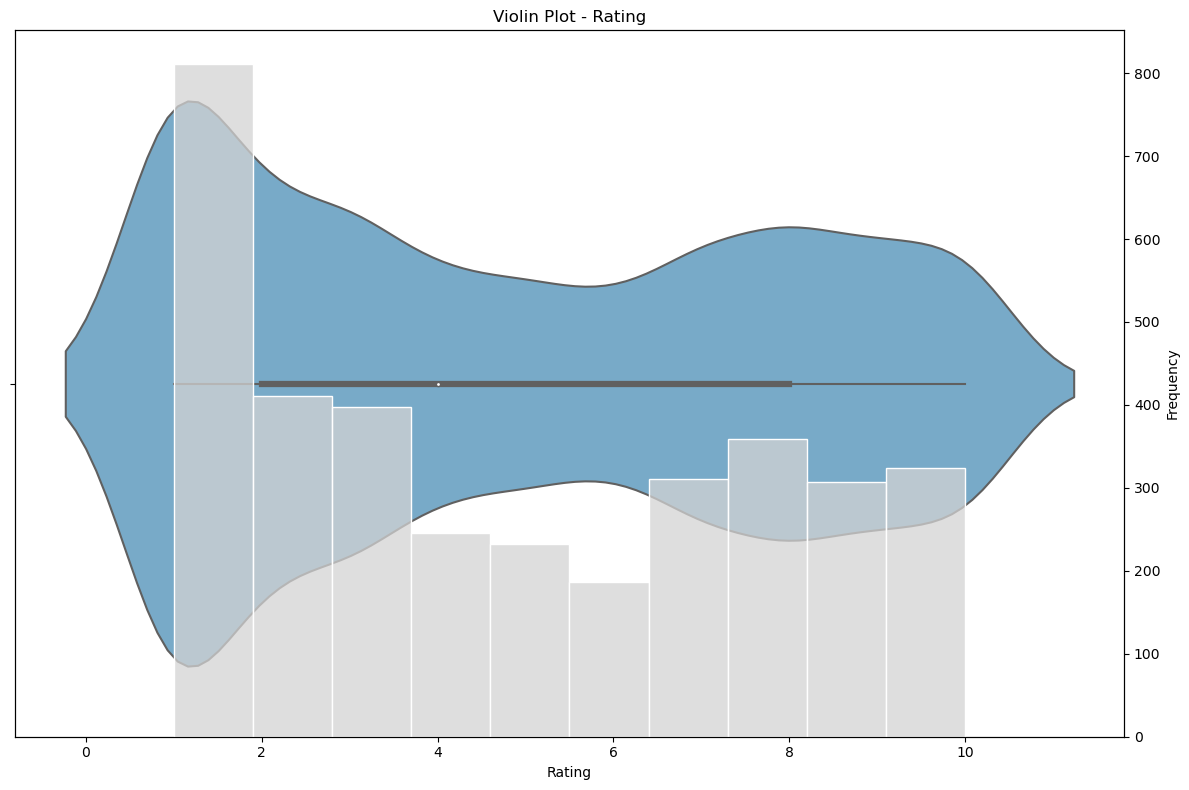

In [15]:
fig, ax = plt.subplots(figsize=(12, 8))

sns.violinplot(data=data, x='rating', ax=ax, palette='Blues')
ax.set_title('Violin Plot - Rating')
ax.set_xlabel('Rating')

ax2 = ax.twinx()
sns.histplot(data=data, x='rating', ax=ax2, bins=10, color='lightgray', edgecolor='white')
ax2.set_ylabel('Frequency')

fig.tight_layout()
plt.show()

### Verification Status

In [16]:
print(data['verification status'].value_counts())

Trip Verified      1071
Verified Review     770
Not Verified        205
Unverified           20
Name: verification status, dtype: int64


In [17]:
def verify(status):
    if isinstance(status, str):
        if status.lower() == 'trip verified' or status.lower() == 'verified review':
            return True
        else:
            return False

data['verification status'] = data['verification status'].astype(str)
data['verification status'] = data['verification status'].apply(verify)
print(data['verification status'].value_counts())

True     1841
False    1745
Name: verification status, dtype: int64


### Author

In [18]:
data = data.drop('author', axis = 1)

In [19]:
display(data)

,review text,verification status,rating,review date,aircraft name,recommendation,type of traveller,seat type
0,Airport check in was functionary with little w...,False,3.0,2023-07-03,A321,False,Couple Leisure,Economy Class
1,Flight fine. In-line with competitors. Pleasan...,True,10.0,2023-07-02,A320,True,Solo Leisure,Economy Class
2,Came from Glasgow to London and took connectin...,True,1.0,2023-06-30,NaN,False,Family Leisure,Economy Class
3,My flight on on 12 May 2023 got delayed an hou...,True,1.0,2023-06-29,NaN,False,Solo Leisure,Economy Class
4,Cairo is a 5 hour flight and BA considers it t...,False,2.0,2023-06-29,A321Neo,False,Couple Leisure,Economy Class
...,...,...,...,...,...,...,...,...
3586,Flew LHR - VIE return operated by bmi but BA a...,False,10.0,2012-08-29,NaN,True,NaN,Economy Class
3587,LHR to HAM. Purser addresses all club passenge...,False,9.0,2012-08-28,NaN,True,NaN,Business Class
3588,My son who had worked for British Airways urge...,False,5.0,2011-10-12,NaN,True,NaN,Economy Class
3589,London City-New York JFK via Shannon on A318 b...,False,4.0,2011-10-11,NaN,False,NaN,Premium Economy


### Type of traveller

In [20]:
print(data['type of traveller'].value_counts())
print(data['type of traveller'].isna().sum())

Couple Leisure    951
Solo Leisure      863
Business          623
Family Leisure    384
Name: type of traveller, dtype: int64
765


Let's just keep it for A while but I'm not sure how much useful this is going to be with that many NaNs

### Aircraft name

In [21]:
data['aircraft name'].value_counts()

A320                     343
Boeing 777               268
Boeing 747-400           182
A380                     160
Boeing 777-200           123
                        ... 
Boeing 777 / A380          1
A320 / Boeing 747-400      1
A320 Finnair               1
Boeing 747-400 / A319      1
Airbus 319                 1
Name: aircraft name, Length: 192, dtype: int64

In [22]:
print(data['aircraft name'].isna().sum())

1725


not much we can use to our benefit here.

In [23]:
data = data.drop('aircraft name', axis = 1)

### Seat type

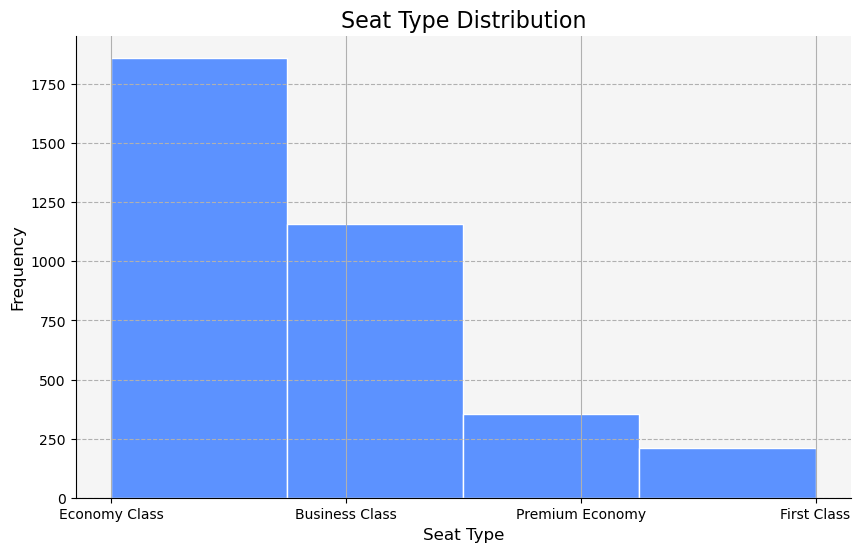

In [24]:
fig, ax = plt.subplots(figsize=(10, 6))

data['seat type'].hist(bins=4, ax=ax, color='#5C92FF', edgecolor='white')

ax.set_title('Seat Type Distribution', fontsize=16)
ax.set_xlabel('Seat Type', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.grid(axis='y', linestyle='--')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_facecolor('#F5F5F5')


### recomendation

In [25]:
data['recommendation'].value_counts()

False    2113
True     1473
Name: recommendation, dtype: int64

In [26]:
print(data['recommendation'].isna().sum())

0


### reivew date

In [27]:
display(data)

,review text,verification status,rating,review date,recommendation,type of traveller,seat type
0,Airport check in was functionary with little w...,False,3.0,2023-07-03,False,Couple Leisure,Economy Class
1,Flight fine. In-line with competitors. Pleasan...,True,10.0,2023-07-02,True,Solo Leisure,Economy Class
2,Came from Glasgow to London and took connectin...,True,1.0,2023-06-30,False,Family Leisure,Economy Class
3,My flight on on 12 May 2023 got delayed an hou...,True,1.0,2023-06-29,False,Solo Leisure,Economy Class
4,Cairo is a 5 hour flight and BA considers it t...,False,2.0,2023-06-29,False,Couple Leisure,Economy Class
...,...,...,...,...,...,...,...
3586,Flew LHR - VIE return operated by bmi but BA a...,False,10.0,2012-08-29,True,NaN,Economy Class
3587,LHR to HAM. Purser addresses all club passenge...,False,9.0,2012-08-28,True,NaN,Business Class
3588,My son who had worked for British Airways urge...,False,5.0,2011-10-12,True,NaN,Economy Class
3589,London City-New York JFK via Shannon on A318 b...,False,4.0,2011-10-11,False,NaN,Premium Economy


In [28]:
data['review date'].info()

<class 'pandas.core.series.Series'>
Int64Index: 3586 entries, 0 to 3590
Series name: review date
Non-Null Count  Dtype 
--------------  ----- 
3586 non-null   object
dtypes: object(1)
memory usage: 56.0+ KB


In [29]:
data['year'] = data['review date'].str[:4].astype(int)

In [30]:
print(data['year'].value_counts())

2015    737
2017    572
2016    570
2014    464
2019    356
2018    324
2022    213
2023    144
2020    104
2021     87
2012     12
2011      3
Name: year, dtype: int64


I have to admit i don't like rudimental data here: 2011 and 2012 have too small number of reviews and in 2013 reviews are absent. But in 2014 we have alreafy 464 reviews. I suppose we should delete 2011 and 2012. 

In [31]:
data = data[~data['year'].isin([2011, 2012])]
print(data['year'].value_counts())

2015    737
2017    572
2016    570
2014    464
2019    356
2018    324
2022    213
2023    144
2020    104
2021     87
Name: year, dtype: int64


In [32]:
print(data.groupby('year')['rating'].mean())

year
2014    5.946121
2015    5.428765
2016    4.985965
2017    3.847902
2018    4.317901
2019    4.764045
2020    4.336538
2021    4.298851
2022    3.995305
2023    3.388889
Name: rating, dtype: float64


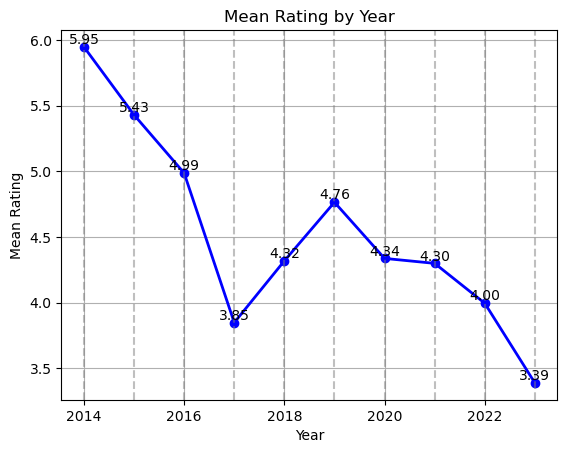

In [33]:
grouped_data = data.groupby('year')['rating'].mean()

plt.plot(grouped_data.index, grouped_data.values, marker='o', color='blue', linestyle='-', linewidth=2)

plt.xlabel('Year')
plt.ylabel('Mean Rating')
plt.title('Mean Rating by Year')
plt.grid(True)

for year in grouped_data.index:
    plt.axvline(x=year, color='gray', linestyle='--', alpha=0.5)

for year, rating in zip(grouped_data.index, grouped_data.values):
    plt.text(year, rating, f'{rating:.2f}', ha='center', va='bottom', color='black')

plt.show()

This trend doesn't look optimistic. 

In [34]:
data['month'] = data['review date'].str[5:7].astype(int)
print(data['month'].value_counts())

6     357
10    348
5     328
1     320
11    314
9     299
7     292
4     292
12    280
3     262
8     262
2     217
Name: month, dtype: int64


In [35]:
print(data.groupby('month')['rating'].mean())

month
1     4.787500
2     4.760369
3     4.328244
4     4.715753
5     5.179878
6     4.574230
7     4.630137
8     4.805344
9     4.836120
10    4.931034
11    4.770701
12    4.939286
Name: rating, dtype: float64


There are some differences but we won't make it our main topic as we can only guess what's behinf it and we have more important insights to discover.

In [36]:
display(data)

,review text,verification status,rating,review date,recommendation,type of traveller,seat type,year,month
0,Airport check in was functionary with little w...,False,3.0,2023-07-03,False,Couple Leisure,Economy Class,2023,7
1,Flight fine. In-line with competitors. Pleasan...,True,10.0,2023-07-02,True,Solo Leisure,Economy Class,2023,7
2,Came from Glasgow to London and took connectin...,True,1.0,2023-06-30,False,Family Leisure,Economy Class,2023,6
3,My flight on on 12 May 2023 got delayed an hou...,True,1.0,2023-06-29,False,Solo Leisure,Economy Class,2023,6
4,Cairo is a 5 hour flight and BA considers it t...,False,2.0,2023-06-29,False,Couple Leisure,Economy Class,2023,6
...,...,...,...,...,...,...,...,...,...
3571,Chicago O'Hare to London Heathrow on 2 May. ch...,False,10.0,2014-05-05,True,NaN,Economy Class,2014,5
3572,Travelled to HKG on board the new A380. Boardi...,False,10.0,2014-05-04,True,NaN,First Class,2014,5
3573,BA 059 London to Cape Town April 29 2014 econo...,False,1.0,2014-05-03,False,NaN,Economy Class,2014,5
3574,Las Vegas-LGW 777 3 class. Business. The uniqu...,False,2.0,2014-05-03,False,NaN,Business Class,2014,5


## Deeper analysis with pivots.

In [37]:
stat = data.pivot_table(index='seat type', columns = 'verification status', values='rating', aggfunc=('mean', 'count'))
print(stat)


                    count            mean          
verification status False True      False     True 
seat type                                          
Business Class        582   571  5.635739  4.646235
Economy Class         851  1002  5.039953  3.836327
First Class           120    90  6.400000  5.522222
Premium Economy       175   178  5.257143  4.528090


Here we can see that for each seat type the the amount of reviews for verified and not verified trips is almost equal. 

In [38]:
stat2 = data.pivot_table(index='seat type', columns = 'verification status', values='rating', aggfunc='mean')
print(stat2)

verification status     False     True 
seat type                              
Business Class       5.635739  4.646235
Economy Class        5.039953  3.836327
First Class          6.400000  5.522222
Premium Economy      5.257143  4.528090


In [39]:
stat2.columns = ('not_verified' ,'verified')

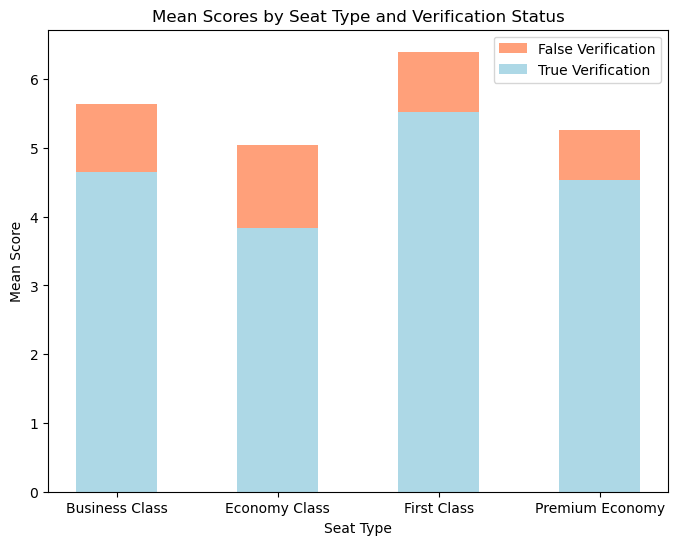

In [40]:
plt.figure(figsize=(8, 6))
x = stat2.index
width = 0.5

color_false = '#FFA07A' 
color_true = '#ADD8E6'  

plt.bar(x, stat2['not_verified'], width, label='False Verification', color=color_false)

plt.bar(x, stat2['verified'], width, label='True Verification', color=color_true)

plt.xlabel('Seat Type')
plt.ylabel('Mean Score')
plt.title('Mean Scores by Seat Type and Verification Status')
plt.xticks(x)
plt.legend()

plt.show()

From here we can see that commenters with verified trips tend to put lower scores.

In my opinion this indicates that there's no rating maniulation from the competitors.

In [41]:
stat3 = data.pivot_table(index='seat type', columns = 'recommendation', values='rating', aggfunc=('mean', 'count'))
print(stat3)

                count            mean          
recommendation  False True      False     True 
seat type                                      
Business Class    622   531  2.680064  8.033898
Economy Class    1167   686  2.269923  7.994169
First Class       106   104  3.415094  8.682692
Premium Economy   208   145  2.663462  8.082759


In [42]:
stat4 = data.pivot_table(index='seat type', columns = 'recommendation', values='rating', aggfunc='mean')
print(stat4)

recommendation      False     True 
seat type                          
Business Class   2.680064  8.033898
Economy Class    2.269923  7.994169
First Class      3.415094  8.682692
Premium Economy  2.663462  8.082759


In [43]:
stat4.columns = ('unlikely_recommendation' ,'likely_recommendation')

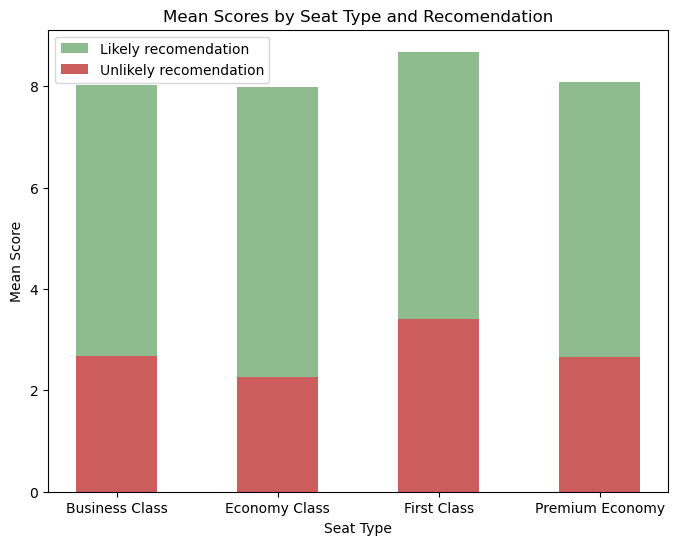

In [44]:
plt.figure(figsize=(8, 6))
x = stat4.index
width = 0.5

color_false = '#CD5C5C' 
color_true = '#8FBC8F'  

plt.bar(x, stat4['likely_recommendation'], width, label='Likely recomendation', color=color_true)
plt.bar(x, stat4['unlikely_recommendation'], width, label='Unlikely recomendation', color=color_false)



plt.xlabel('Seat Type')
plt.ylabel('Mean Score')
plt.title('Mean Scores by Seat Type and Recomendation')

plt.legend()

plt.show()

Here we can see that those who estimate their experience highly will more likely recommend the company. This looks obvious but stil worth stressing. 

# Working with text data

## Preprocessing

In [45]:
display(data)

,review text,verification status,rating,review date,recommendation,type of traveller,seat type,year,month
0,Airport check in was functionary with little w...,False,3.0,2023-07-03,False,Couple Leisure,Economy Class,2023,7
1,Flight fine. In-line with competitors. Pleasan...,True,10.0,2023-07-02,True,Solo Leisure,Economy Class,2023,7
2,Came from Glasgow to London and took connectin...,True,1.0,2023-06-30,False,Family Leisure,Economy Class,2023,6
3,My flight on on 12 May 2023 got delayed an hou...,True,1.0,2023-06-29,False,Solo Leisure,Economy Class,2023,6
4,Cairo is a 5 hour flight and BA considers it t...,False,2.0,2023-06-29,False,Couple Leisure,Economy Class,2023,6
...,...,...,...,...,...,...,...,...,...
3571,Chicago O'Hare to London Heathrow on 2 May. ch...,False,10.0,2014-05-05,True,NaN,Economy Class,2014,5
3572,Travelled to HKG on board the new A380. Boardi...,False,10.0,2014-05-04,True,NaN,First Class,2014,5
3573,BA 059 London to Cape Town April 29 2014 econo...,False,1.0,2014-05-03,False,NaN,Economy Class,2014,5
3574,Las Vegas-LGW 777 3 class. Business. The uniqu...,False,2.0,2014-05-03,False,NaN,Business Class,2014,5


In [46]:
corpus = data['review text']
print(corpus)

0       Airport check in was functionary with little w...
1       Flight fine. In-line with competitors. Pleasan...
2       Came from Glasgow to London and took connectin...
3       My flight on on 12 May 2023 got delayed an hou...
4       Cairo is a 5 hour flight and BA considers it t...
                              ...                        
3571    Chicago O'Hare to London Heathrow on 2 May. ch...
3572    Travelled to HKG on board the new A380. Boardi...
3573    BA 059 London to Cape Town April 29 2014 econo...
3574    Las Vegas-LGW 777 3 class. Business. The uniqu...
3575    An interesting contrast on recent Gatwick to T...
Name: review text, Length: 3571, dtype: object


nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

In [47]:
lemmatizer = WordNetLemmatizer()
stop_words = set(nltk_stopwords.words('english'))

In [48]:
def lemmatize_comment(comment):
    words = nltk.word_tokenize(comment.lower())
    words = [word for word in words if word not in stop_words]
    words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(words)

In [49]:
start_time = time.time()
corpus  = data['review text'].apply(lemmatize_comment)
end_time = time.time()
print('Execution time:', end_time - start_time, 'seconds')
print(corpus)

Execution time: 5.424439191818237 seconds
0       airport check functionary little warmth effici...
1       flight fine . in-line competitor . pleasant cr...
2       came glasgow london took connecting flight ame...
3       flight 12 may 2023 got delayed hour 25 minute ...
4       cairo 5 hour flight ba considers short haul , ...
                              ...                        
3571    chicago o'hare london heathrow 2 may . check f...
3572    travelled hkg board new a380 . boarding effici...
3573    ba 059 london cape town april 29 2014 economy ...
3574    la vegas-lgw 777 3 class . business . unique f...
3575    interesting contrast recent gatwick turin back...
Name: review text, Length: 3571, dtype: object


In [50]:
def clear_comment(comment):
    comment = re.sub(r'[^\w\s+]', '', comment)
    comment = re.sub(r'\d+', '', comment)
    return ' '.join(comment.split())

In [51]:
start_time = time.time()
texts = corpus.apply(clear_comment)
end_time = time.time()
print('Execution time:', end_time - start_time, 'seconds')

Execution time: 0.12119412422180176 seconds


In [52]:
print(texts)

0       airport check functionary little warmth effici...
1       flight fine inline competitor pleasant crew ni...
2       came glasgow london took connecting flight ame...
3       flight may got delayed hour minute resulted ca...
4       cairo hour flight ba considers short haul ever...
                              ...                        
3571    chicago ohare london heathrow may check fast e...
3572    travelled hkg board new a boarding efficient d...
3573    ba london cape town april economy s since flew...
3574    la vegaslgw class business unique forward faci...
3575    interesting contrast recent gatwick turin back...
Name: review text, Length: 3571, dtype: object


In [53]:
bow = [text.split() for text in texts]

In [54]:
#print(bow)

## Topic modeling with LDA

In [55]:
dictionary = corpora.Dictionary(bow)
corpus_new = [dictionary.doc2bow(review) for review in bow]

In [56]:
lda_model = models.LdaModel(corpus_new, num_topics=10, id2word=dictionary)

topics = lda_model.print_topics(num_topics=10)

for topic in topics:
    print(topic)

(0, '0.029*"seat" + 0.016*"flight" + 0.014*"ba" + 0.012*"airway" + 0.012*"good" + 0.011*"british" + 0.010*"food" + 0.009*"service" + 0.009*"nt" + 0.007*"economy"')
(1, '0.034*"flight" + 0.030*"ba" + 0.010*"service" + 0.009*"staff" + 0.008*"seat" + 0.008*"airway" + 0.007*"london" + 0.007*"would" + 0.007*"british" + 0.007*"time"')
(2, '0.025*"seat" + 0.012*"flight" + 0.011*"ba" + 0.009*"would" + 0.009*"london" + 0.006*"get" + 0.005*"nt" + 0.005*"one" + 0.005*"service" + 0.005*"good"')
(3, '0.026*"seat" + 0.013*"ba" + 0.010*"class" + 0.009*"business" + 0.009*"flight" + 0.008*"time" + 0.008*"airway" + 0.008*"one" + 0.008*"british" + 0.007*"meal"')
(4, '0.023*"flight" + 0.019*"class" + 0.018*"business" + 0.012*"service" + 0.011*"seat" + 0.011*"passenger" + 0.010*"ba" + 0.007*"lounge" + 0.007*"food" + 0.007*"crew"')
(5, '0.013*"seat" + 0.010*"ba" + 0.010*"british" + 0.009*"airway" + 0.008*"flight" + 0.007*"crew" + 0.007*"airline" + 0.007*"passenger" + 0.007*"time" + 0.006*"nt"')
(6, '0.031*"

let's try to somehow manually ugrade these topics: 

- seat good meal cabin crew
- flight seat time good food crew service
- flight time food crew service
- food service time seat
- service staff economy food

Some more also but I don't see how it helps

We can proceed with this one but we can try other instruments for our analysys.

## Sentiment Analysis

In [57]:
sia = SentimentIntensityAnalyzer()

In [58]:
sentiments = []
for text in texts:
    sentiment_scores = sia.polarity_scores(text)
    sentiment = sentiment_scores['compound']
    sentiments.append(sentiment)

In [59]:
sentiment_labels = ['Positive' if s >= 0 else 'Negative' for s in sentiments]

In [60]:
data['sentiment'] = sentiment_labels
display(data)

,review text,verification status,rating,review date,recommendation,type of traveller,seat type,year,month,sentiment
0,Airport check in was functionary with little w...,False,3.0,2023-07-03,False,Couple Leisure,Economy Class,2023,7,Positive
1,Flight fine. In-line with competitors. Pleasan...,True,10.0,2023-07-02,True,Solo Leisure,Economy Class,2023,7,Positive
2,Came from Glasgow to London and took connectin...,True,1.0,2023-06-30,False,Family Leisure,Economy Class,2023,6,Negative
3,My flight on on 12 May 2023 got delayed an hou...,True,1.0,2023-06-29,False,Solo Leisure,Economy Class,2023,6,Negative
4,Cairo is a 5 hour flight and BA considers it t...,False,2.0,2023-06-29,False,Couple Leisure,Economy Class,2023,6,Negative
...,...,...,...,...,...,...,...,...,...,...
3571,Chicago O'Hare to London Heathrow on 2 May. ch...,False,10.0,2014-05-05,True,NaN,Economy Class,2014,5,Positive
3572,Travelled to HKG on board the new A380. Boardi...,False,10.0,2014-05-04,True,NaN,First Class,2014,5,Positive
3573,BA 059 London to Cape Town April 29 2014 econo...,False,1.0,2014-05-03,False,NaN,Economy Class,2014,5,Negative
3574,Las Vegas-LGW 777 3 class. Business. The uniqu...,False,2.0,2014-05-03,False,NaN,Business Class,2014,5,Positive


In [61]:
sentiment_eval = data.pivot_table(
    index='rating', columns = 'sentiment', values='month', aggfunc='count')
sentiment_eval['Positive_rate'] = sentiment_eval['Positive']/(
    sentiment_eval['Positive'] + sentiment_eval['Negative'])

print(sentiment_eval)

sentiment  Negative  Positive  Positive_rate
rating                                      
1.0             529       281       0.346914
2.0             212       199       0.484185
3.0             170       228       0.572864
4.0              92       148       0.616667
5.0              57       173       0.752174
6.0              34       152       0.817204
7.0              19       291       0.938710
8.0              13       344       0.963585
9.0               8       298       0.973856
10.0              5       318       0.984520


In [62]:
#sentiment_eval = sentiment_eval.set_index('sentimentrating').T
print(sentiment_eval.index)
#sentiment_eval.info()

Float64Index([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0], dtype='float64', name='rating')


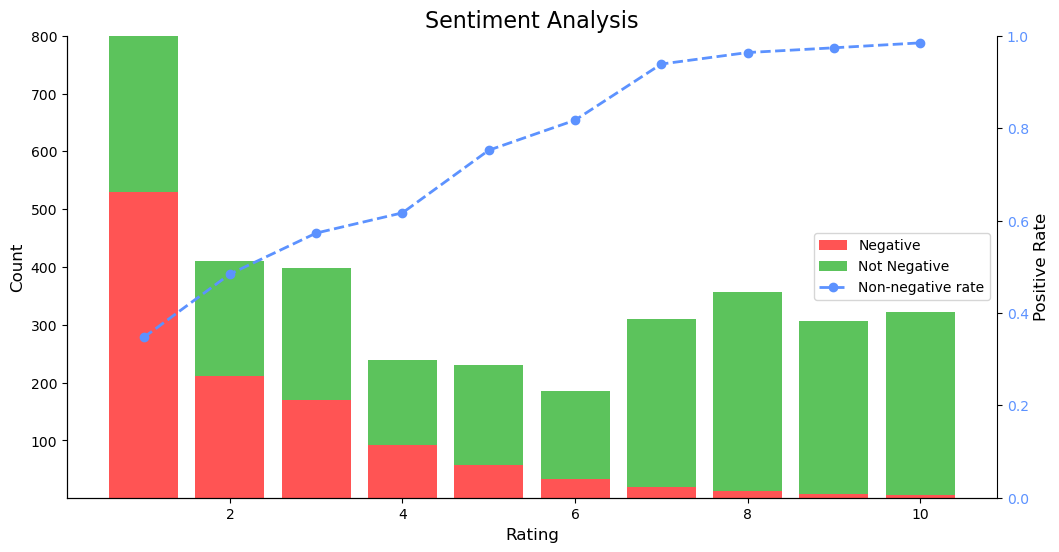

In [86]:
fig, ax1 = plt.subplots(figsize=(12, 6))
ax2 = ax1.twinx()  # Create a twin Axes object for the secondary y-axis

# Plot the bars
ax1.bar(sentiment_eval.index, sentiment_eval['Negative'], color='#FF5454', label='Negative')
ax1.bar(sentiment_eval.index, sentiment_eval['Positive'], bottom=sentiment_eval['Negative'], color='#5CC35C',
        label='Not Negative')
ax2.plot(sentiment_eval.index, sentiment_eval['Positive_rate'], marker='o', color='#5C92FF', linewidth=2,
         linestyle='--', label='Non-negative rate')

ax1.set_ylim(1, 800)  
ax2.set_ylim(0, 1)
ax1.set_ylabel('Count', fontsize=12)
ax2.set_ylabel('Positive Rate', fontsize=12)

ax1.set_xlabel('Rating', fontsize=12)
ax1.set_title('Sentiment Analysis', fontsize=16)

ax2.tick_params(axis='y', labelcolor='#5C92FF')

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='right', fontsize=10)

ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(True)

plt.show()

It's worth mentioning that already rating 5.0 has a high (75%) positive rate. Let's check some comments with this rating

In [64]:
pd.set_option('display.max_colwidth', None)
print(data['review text'][data['rating']==5.0].head(10))

54     Regarding the aircraft and seat: The business class seats on this flight were pretty good. All were of the suite type, where every seat has its own booth with sliding door for extra privacy. The downside to this is that if you are travelling as a couple, its quite difficult to interact. There is ample storage and USB charging ports. The seat is pretty comfortable. As someone who finds it very difficult to sleep on flights, this was one of the only times I've been able to get a few minutes sleep here and there. The amenities provided are pretty average when compared to other airlines. The leather toiletry bag was quite nice though. No slippers, only a pair of socks. The restrooms on the flight are very small, and don't provide much in the way of toiletries compared to other airlines. No free Wi-Fi in Business Class is not acceptable. Another example of BA's penny pinching in recent years. Regarding the staff and customer service: Poor. Inattentive. Beyond meal times there was off

In [65]:
pd.set_option('display.max_colwidth', 50)

Having read 10 reviews we can decide to trust our Sentiment Analysis and also we can conclude that we shouldn't be too afraid of lower scores. Of course they mean we get less recomendations which is a problem but still it's a bit better then it looks. 

## Word cloud

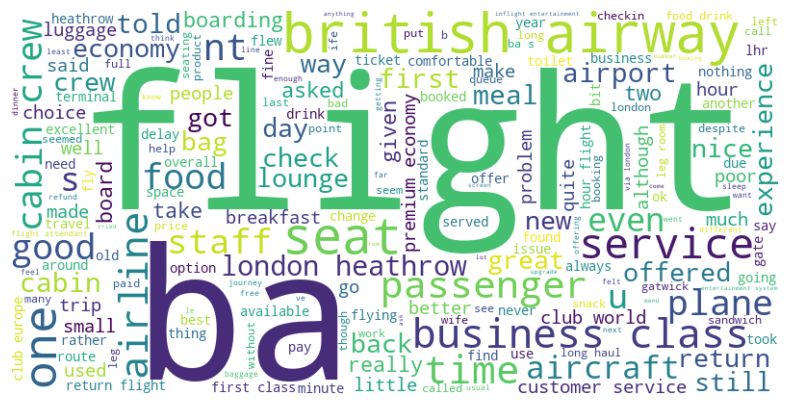

In [66]:
all_text = ' '.join(texts)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

I think we now can use some words from the cloud and LDA to create clusters and compare them.

# Estimation of different aspects

## Creating topics markers

### functions for markers

In [67]:
def find_staff(text):
    pattern = r'(crew|staff|service)'
    matches = re.findall(pattern, text, flags=re.IGNORECASE)
    if matches:
        return True
    else:
        return False

In [68]:
def find_food(text):
    pattern = r'(food|meal|breakfast|lunch)'
    matches = re.findall(pattern, text, flags=re.IGNORECASE)
    if matches:
        return True
    else:
        return False

In [69]:
def find_plane(text):
    pattern = r'(seat|aircraft|airplane|plane)'
    matches = re.findall(pattern, text, flags=re.IGNORECASE)
    if matches:
        return True
    else:
        return False

In [70]:
def find_preflight(text):
    pattern = r'(boarding|lounge|queue)'
    matches = re.findall(pattern, text, flags=re.IGNORECASE)
    if matches:
        return True
    else:
        return False

In [71]:
def find_place(text):
    pattern = r'(london|heathrow|airport)'
    matches = re.findall(pattern, text, flags=re.IGNORECASE)
    if matches:
        return True
    else:
        return False

### Application of functions

In [72]:
display(data)

,review text,verification status,rating,review date,recommendation,type of traveller,seat type,year,month,sentiment
0,Airport check in was functionary with little w...,False,3.0,2023-07-03,False,Couple Leisure,Economy Class,2023,7,Positive
1,Flight fine. In-line with competitors. Pleasan...,True,10.0,2023-07-02,True,Solo Leisure,Economy Class,2023,7,Positive
2,Came from Glasgow to London and took connectin...,True,1.0,2023-06-30,False,Family Leisure,Economy Class,2023,6,Negative
3,My flight on on 12 May 2023 got delayed an hou...,True,1.0,2023-06-29,False,Solo Leisure,Economy Class,2023,6,Negative
4,Cairo is a 5 hour flight and BA considers it t...,False,2.0,2023-06-29,False,Couple Leisure,Economy Class,2023,6,Negative
...,...,...,...,...,...,...,...,...,...,...
3571,Chicago O'Hare to London Heathrow on 2 May. ch...,False,10.0,2014-05-05,True,NaN,Economy Class,2014,5,Positive
3572,Travelled to HKG on board the new A380. Boardi...,False,10.0,2014-05-04,True,NaN,First Class,2014,5,Positive
3573,BA 059 London to Cape Town April 29 2014 econo...,False,1.0,2014-05-03,False,NaN,Economy Class,2014,5,Negative
3574,Las Vegas-LGW 777 3 class. Business. The uniqu...,False,2.0,2014-05-03,False,NaN,Business Class,2014,5,Positive


In [73]:
data['aircraft'] =  data['review text'].apply(find_plane)

In [74]:
display(data.head(3))
print(data['aircraft'].value_counts())

,review text,verification status,rating,review date,recommendation,type of traveller,seat type,year,month,sentiment,aircraft
0,Airport check in was functionary with little w...,False,3.0,2023-07-03,False,Couple Leisure,Economy Class,2023,7,Positive,True
1,Flight fine. In-line with competitors. Pleasan...,True,10.0,2023-07-02,True,Solo Leisure,Economy Class,2023,7,Positive,True
2,Came from Glasgow to London and took connectin...,True,1.0,2023-06-30,False,Family Leisure,Economy Class,2023,6,Negative,False


True     2553
False    1018
Name: aircraft, dtype: int64


In [75]:
data['staff'] =  data['review text'].apply(find_staff)
display(data.head(3))
print(data['staff'].value_counts())

,review text,verification status,rating,review date,recommendation,type of traveller,seat type,year,month,sentiment,aircraft,staff
0,Airport check in was functionary with little w...,False,3.0,2023-07-03,False,Couple Leisure,Economy Class,2023,7,Positive,True,True
1,Flight fine. In-line with competitors. Pleasan...,True,10.0,2023-07-02,True,Solo Leisure,Economy Class,2023,7,Positive,True,True
2,Came from Glasgow to London and took connectin...,True,1.0,2023-06-30,False,Family Leisure,Economy Class,2023,6,Negative,False,False


True     2828
False     743
Name: staff, dtype: int64


In [76]:
data['food'] =  data['review text'].apply(find_food)
display(data.head(3))
print(data['food'].value_counts())

,review text,verification status,rating,review date,recommendation,type of traveller,seat type,year,month,sentiment,aircraft,staff,food
0,Airport check in was functionary with little w...,False,3.0,2023-07-03,False,Couple Leisure,Economy Class,2023,7,Positive,True,True,True
1,Flight fine. In-line with competitors. Pleasan...,True,10.0,2023-07-02,True,Solo Leisure,Economy Class,2023,7,Positive,True,True,False
2,Came from Glasgow to London and took connectin...,True,1.0,2023-06-30,False,Family Leisure,Economy Class,2023,6,Negative,False,False,False


True     2209
False    1362
Name: food, dtype: int64


In [77]:
data['preflight'] =  data['review text'].apply(find_preflight)
display(data.head(3))
print(data['preflight'].value_counts())

,review text,verification status,rating,review date,recommendation,type of traveller,seat type,year,month,sentiment,aircraft,staff,food,preflight
0,Airport check in was functionary with little w...,False,3.0,2023-07-03,False,Couple Leisure,Economy Class,2023,7,Positive,True,True,True,True
1,Flight fine. In-line with competitors. Pleasan...,True,10.0,2023-07-02,True,Solo Leisure,Economy Class,2023,7,Positive,True,True,False,False
2,Came from Glasgow to London and took connectin...,True,1.0,2023-06-30,False,Family Leisure,Economy Class,2023,6,Negative,False,False,False,False


False    2347
True     1224
Name: preflight, dtype: int64


In [78]:
data['airport'] =  data['review text'].apply(find_place)
display(data.head(3))
print(data['airport'].value_counts())

,review text,verification status,rating,review date,recommendation,type of traveller,seat type,year,month,sentiment,aircraft,staff,food,preflight,airport
0,Airport check in was functionary with little w...,False,3.0,2023-07-03,False,Couple Leisure,Economy Class,2023,7,Positive,True,True,True,True,True
1,Flight fine. In-line with competitors. Pleasan...,True,10.0,2023-07-02,True,Solo Leisure,Economy Class,2023,7,Positive,True,True,False,False,True
2,Came from Glasgow to London and took connectin...,True,1.0,2023-06-30,False,Family Leisure,Economy Class,2023,6,Negative,False,False,False,False,True


True     2328
False    1243
Name: airport, dtype: int64


## Comparing topics

In [79]:
mean_rating = data['rating'].mean()
print(mean_rating)

4.777933352002241


In [80]:
#data.pivot_table(index='seat type', columns = 'verification status', values='rating', aggfunc='mean')

data['aircraft'] = data['aircraft'].astype(str)
data['staff'] = data['staff'].astype(str)
data['food'] = data['food'].astype(str)
data['preflight'] = data['preflight'].astype(str)
data['airport'] = data['airport'].astype(str)

In [81]:
topics = ['aircraft', 'staff', 'food', 'preflight', 'airport']
pivot = []

In [82]:
for i in topics:
    topic = data.groupby(i)['rating'].mean()
    pivot.append(topic)
print(pivot)

[aircraft
False    4.592338
True     4.851939
Name: rating, dtype: float64, staff
False    3.698520
True     5.061528
Name: rating, dtype: float64, food
False    3.895742
True     5.321865
Name: rating, dtype: float64, preflight
False    4.507456
True     5.296569
Name: rating, dtype: float64, airport
False    5.084473
True     4.614261
Name: rating, dtype: float64]


In [83]:
df = pd.DataFrame(pivot)
print(df)

           False     True 
rating  4.592338  4.851939
rating  3.698520  5.061528
rating  3.895742  5.321865
rating  4.507456  5.296569
rating  5.084473  4.614261


In [84]:
data = {
    'aircraft': [4.592338, 4.851939],
    'staff': [3.698520, 5.061528],
    'food': [3.895742, 5.321865],
    'preflight': [4.507456, 5.296569],
    'airport': [5.084473, 4.614261]
}

df = pd.DataFrame(data)
print(df)

   aircraft     staff      food  preflight   airport
0  4.592338  3.698520  3.895742   4.507456  5.084473
1  4.851939  5.061528  5.321865   5.296569  4.614261


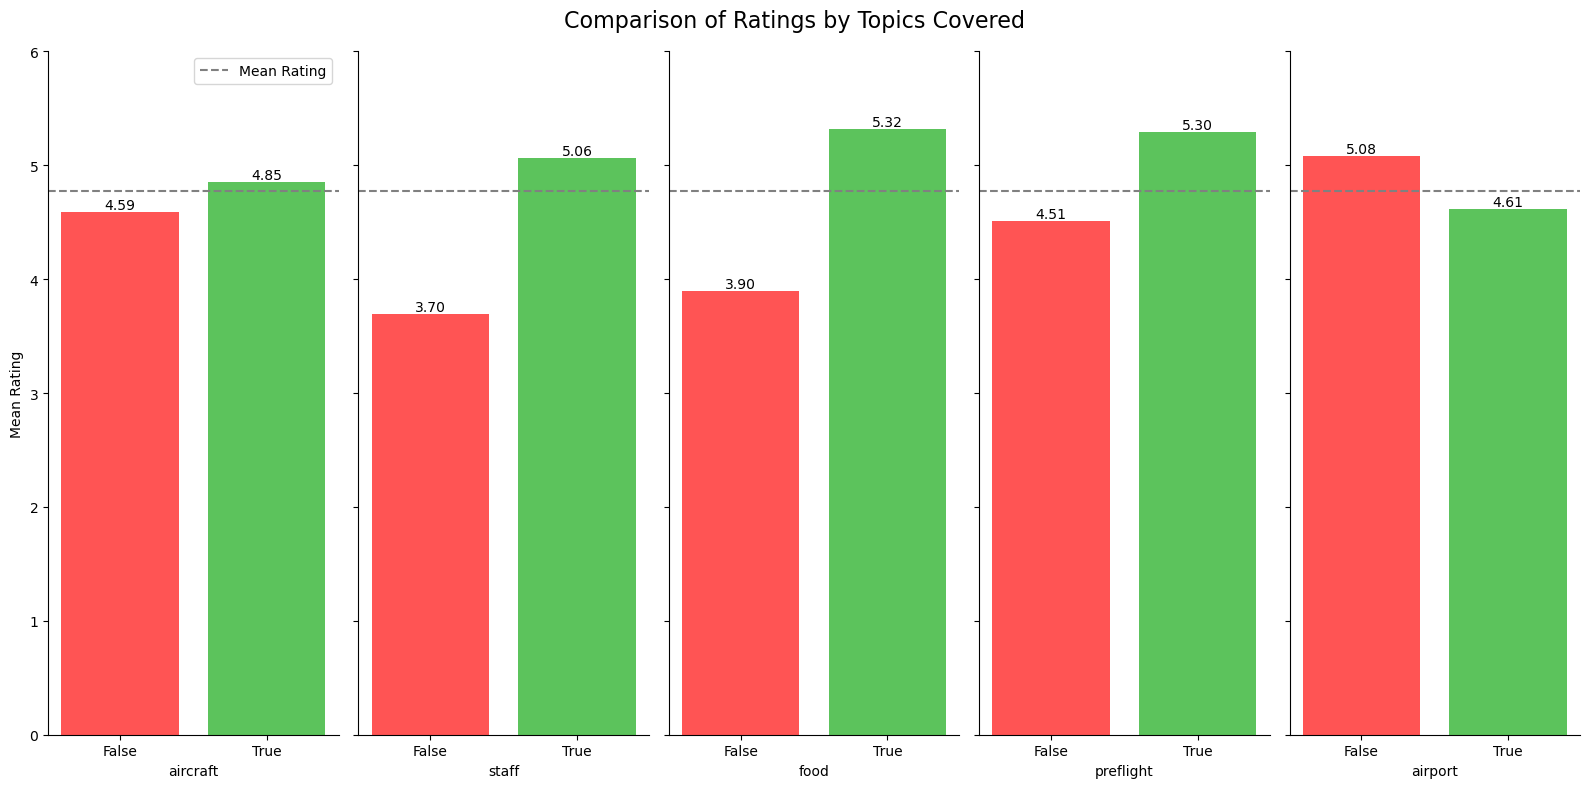

In [85]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(16, 8), sharey=True)

colors = ['#FF5454', '#5CC35C']

for i, col in enumerate(df.columns):
    ax = axes[i]
    bars = ax.bar([0, 1], df[col], color=colors)
    ax.axhline(mean_rating, linestyle='--', color='gray', label='Mean Rating')
    ax.set_xticks([0, 1])
    ax.set_xticklabels(['False', 'True'])
    ax.set_xlabel(col)
    ax.set_ylim(0, 6)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}', (bar.get_x() + bar.get_width() / 2, height), ha='center', va='bottom')

axes[0].set_ylabel('Mean Rating')

fig.suptitle('Comparison of Ratings by Topics Covered', fontsize=16)

fig.tight_layout()
axes[0].legend()

plt.show()

Reviews that encompass food, staff, and the pre-flight experience consistently receive higher scores and ratings. Conversely, the airport aspect tends to receive lower scores in comparison.

# Conclusion

We have scraped https://www.airlinequality.com for reviews on British Airways and then analyzed these reviews using a number of data analysis and machine learning instruments.

Here are our key findings: 
1. Yearly ratings are decreasing
2. Verified flights have lower ratings 
3. Higher scores mean more recommendations
4. Ratings mean better then they look at first glance. Only 25% of rating=5 comments are negative. 
5. Most mentioned topics are food, staff, pre-flight experience, airort experience and the aircraft.
6. Reviews that encompass food, staff, and the pre-flight experience consistently receive higher scores and ratings. Conversely, the airport aspect tends to receive lower scores in comparison.